# SVM Model for Heart Disease Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv("heart (1).csv")
data.tail()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,138,175,0,Normal,173,N,0.0,Up,0


In [3]:
data.isna().sum()

Age               0
Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data = data.drop(["FastingBS", "RestingECG"], axis = 1)

In [5]:
x = data.drop("HeartDisease", axis = 1)
y = data["HeartDisease"]

In [6]:
catagorical_features = ["Sex", "ExerciseAngina", "ST_Slope"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   catagorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[  0. ,   1. ,   1. , ..., 289. , 172. ,   0. ],
       [  1. ,   0. ,   1. , ..., 180. , 156. ,   1. ],
       [  0. ,   1. ,   1. , ..., 283. ,  98. ,   0. ],
       ...,
       [  0. ,   1. ,   0. , ..., 131. , 115. ,   1.2],
       [  1. ,   0. ,   1. , ..., 236. , 174. ,   0. ],
       [  0. ,   1. ,   1. , ..., 175. , 173. ,   0. ]])

In [7]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 12), (184, 12), (734,), (184,))

In [9]:
model = SVC(C=100, kernel='poly')

In [10]:
model.fit(x_train, y_train)

SVC(C=100, kernel='poly')

In [11]:
y_predict1 = model.predict(x_train)

In [12]:
y_train.shape, y_predict1.shape

((734,), (734,))

In [13]:
accuracy1 = accuracy_score(y_predict1, y_train) 
print(accuracy1)

0.8637602179836512


In [14]:
y_pred1 = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred1)
matrix

array([[62, 15],
       [19, 88]], dtype=int64)

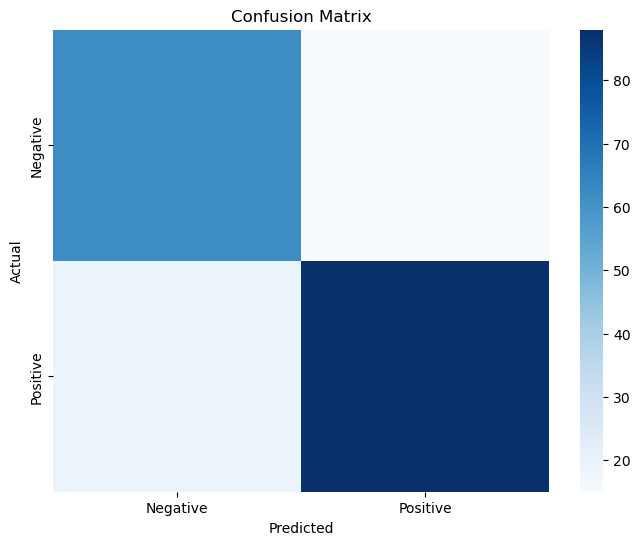

In [15]:
class_names = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_predict2 = model.predict(x_train)
y_predict2

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [18]:
accuracy2 = accuracy_score(y_predict2, y_train) 
print(accuracy2)

1.0


In [19]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

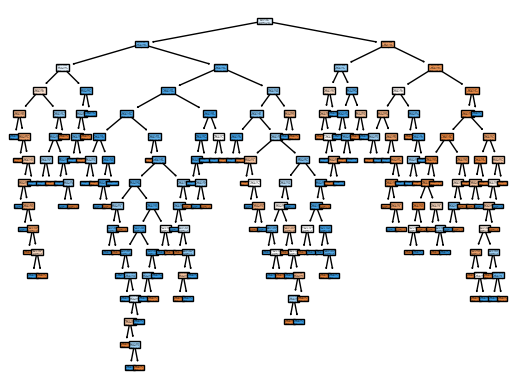

In [20]:
plot_tree(model, filled=True);

In [21]:
y_predict3 = model.predict(x_train)
y_predict3

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [22]:
accuracy3 = accuracy_score(y_predict3, y_train) 
print(accuracy3)

1.0


In [28]:
data = {
    'accuracy_SVM': [accuracy1],
    'accuracy_DT': [accuracy3],
    'accuracy_RF': [accuracy2]
}

campare = pd.DataFrame(data)
campare



,accuracy_SVM,accuracy_DT,accuracy_RF
0,0.86376,1.0,1.0


In [38]:
data = pd.read_csv("heart (1).csv")
data.tail()

data = data.drop(["FastingBS", "RestingECG", "Cholesterol"], axis = 1)

x = data.drop("HeartDisease", axis = 1)
y = data["HeartDisease"]

catagorical_features = ["Sex", "ExerciseAngina", "ST_Slope"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   catagorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = SVC(C=100, kernel='poly')
model.fit(x_train, y_train)

y_predict1 = model.predict(x_train)

y_train.shape, y_predict1.shape


accuracy1 = accuracy_score(y_predict1, y_train) 
print(accuracy1)

0.8392370572207084


# Question 2

In [56]:
data = pd.read_csv("Churn_Modelling (1).csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
x = data.drop("Exited", axis = 1)
y = data["Exited"]

In [58]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler , OneHotEncoder ,LabelEncoder ,MinMaxScaler

In [59]:
sampling = RandomOverSampler(sampling_strategy="auto", random_state=0)
x_sampler, y_sampler = sampling.fit_resample(x, y)

In [60]:
scaler = StandardScaler()
encoder = OneHotEncoder()

In [61]:
from sklearn.compose import ColumnTransformer
category =["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numerical = ["CreditScore","RowNumber", "CustomerId", "Age","Tenure","Balance","EstimatedSalary"]


transform = ColumnTransformer([("numerical",scaler,numerical),
                               ("category",encoder,category)],remainder="passthrough")

trans_x =  transform.fit_transform(x_sampler)
trans_x

<15926x2952 sparse matrix of type '<class 'numpy.float64'>'
	with 207038 stored elements in Compressed Sparse Row format>

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(trans_x , y_sampler,test_size =0.2)

In [63]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [64]:
model = Sequential()

model.add(Dense(units = 200 , activation = "relu" ,input_shape=(2952,)))

model.add(Dense(units = 68 ,activation = "relu"))

model.add(Dense(2 ,activation = "softmax"))

model.compile(optimizer='adam', loss="binary_crossentropy",metrics = ["accuracy"])


In [65]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test) 

model.fit(x_train ,y_train_encoded ,batch_size = 32 ,epochs = 3)

Epoch 1/3
399/399 [==============================] - 7s 14ms/step - loss: 0.4718 - accuracy: 0.7770
Epoch 2/3
399/399 [==============================] - 6s 14ms/step - loss: 0.2926 - accuracy: 0.8816
Epoch 3/3
399/399 [==============================] - 6s 14ms/step - loss: 0.1557 - accuracy: 0.9436


In [66]:
y_predict_encoded = model.predict(x_test)
y_pred = np.argmax(y_predict_encoded,axis = 1)
y_pred

100/100 [==============================] - 0s 2ms/step


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC Score (only applicable for binary classification tasks)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[1435  198]
 [  91 1462]]

Accuracy: 0.9092906465787822
Precision: 0.880722891566265
Recall: 0.9414037347070187
F1-Score: 0.9100529100529099
ROC-AUC Score: 0.9100772500846789
